# Classification CAH

In this notebook, the data with 100000 flights is used to conduct the classification.

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import ward, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.ensemble import GradientBoostingClassifier


In [28]:
%run pretreatment.py
%run "../flight phase on dataset/db.py"

database_name = 'descriptors_1.db'

columns_dropped = ['icao', 'icao_airline', 'duration_cruise', 'airport_climb', 'airport_descent']

df, df_meteo, df_operation, airlines_decoder = pretreatment(database_name, columns_dropped, threshold_nb_flights=100, drop_min_max=True)
columns = df.columns
mad, clf, accuracy, X_train, X_test, y_train, y_test = feature_selection_baseline(df, n_estimators=100)
columns_remained = feature_selection(mad, clf, accuracy, X_train, X_test, y_train, y_test, columns, begin=-3, end=3, n_choices=10)

number of evaluation is 1
number of evaluation is 2


In [29]:
columns_meteo = df_meteo.columns
mad, clf, accuracy, X_train, X_test, y_train, y_test = feature_selection_baseline(df_meteo, n_estimators=100)
columns_remained_meteo = feature_selection(mad, clf, accuracy, X_train, X_test, y_train, y_test, columns_meteo, begin=-3, end=3, n_choices=10)

number of evaluation is 1


In [30]:
columns_operation = df_operation.columns
mad, clf, accuracy, X_train, X_test, y_train, y_test = feature_selection_baseline(df_operation, n_estimators=100)
columns_remained_operation = feature_selection(mad, clf, accuracy, X_train, X_test, y_train, y_test, columns_operation, begin=-3, end=3, n_choices=10)

number of evaluation is 1


In [31]:
%run pretreatment.py
print(f'Columns deleted for whole dataset: {columns_deleted(columns, columns_remained)}')
print(f'Columns deleted for meteo sub dataset: {columns_deleted(columns_meteo, columns_remained_meteo)}')
print(f'Columns deleted for meteo sub dataset: {columns_deleted(columns_operation, columns_remained_operation)}')

Columns deleted for whole dataset: ['wind_spind_kt_climb']
Columns deleted for meteo sub dataset: ['wind_spind_kt_climb', 'wind_spind_kt_descent']
Columns deleted for meteo sub dataset: ['avg_vertrate_speed_cruise']


In [34]:
X = df.iloc[:,:-1]
y = df.loc[:,["airline_cat"]]

In [35]:
df

,duration_descent,avg_speed_descent,std_speed_descent,avg_vertrate_speed_descent,std_vertrate_speed_descent,temp_c_descent,dewpoint_c_descent,wind_spind_kt_descent,avg_speed_cruise,std_speed_cruise,...,std_altitude_cruise,duration_climb,avg_speed_climb,std_speed_climb,avg_vertrate_speed_climb,std_vertrate_speed_climb,temp_c_climb,dewpoint_c_climb,wind_spind_kt_climb,airline_cat
flight_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,700.0,177.901111,47.118451,9.211667,4.553928,NaN,NaN,NaN,69
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.516000,0.423047,...,3.934951e+00,1000.0,193.327647,51.489957,8.331176,3.041161,NaN,NaN,NaN,187
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.991786,2.265739,...,3.873791e+00,1059.0,193.617037,53.704506,9.981667,3.595116,-5.0,-11.0,11.0,20
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1130.0,181.721961,41.385966,9.256471,4.766493,-30.0,-33.0,6.0,139
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.549467,2.904411,...,7.678811e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.113051,1.727852,...,4.172426e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42
69396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.002727,5.028199,...,2.297516e+00,830.0,201.061935,44.985422,10.005161,3.973682,NaN,NaN,NaN,22
69397,1411.0,155.217805,51.96957,-6.343415,4.407932,NaN,NaN,NaN,263.313194,5.069292,...,1.126961e+03,1310.0,223.769111,51.400093,9.239556,4.854137,NaN,NaN,NaN,156


# Aggregating data

In [168]:
new_df = df_operation.copy()

In [159]:
#new_df_scaled = MaxAbsScaler().fit_transform(df)
#new_df_scaled = pd.DataFrame(new_df_scaled, columns=df.columns)

In [169]:
df_median = selected_df.groupby(by = 'airline_cat').median()

In [170]:
df_median.dropna(inplace=True)

In [171]:
df_median_scaled = MaxAbsScaler().fit_transform(df_median)
df_median_scaled = pd.DataFrame(df_median_scaled, columns=df_median.columns)

In [172]:
df_median_scaled

,duration_descent,avg_speed_descent,std_speed_descent,avg_vertrate_speed_descent,std_vertrate_speed_descent,avg_speed_cruise,std_speed_cruise,avg_vertrate_speed_cruise,std_vertrate_speed_cruise,mean_altitude_cruise,std_altitude_cruise,duration_climb,avg_speed_climb,std_speed_climb,avg_vertrate_speed_climb,std_vertrate_speed_climb
0,0.816754,0.861658,0.704335,-0.807841,0.823010,0.783524,0.283623,-6.004268e-18,0.467850,0.999872,0.023122,0.756106,0.910186,0.771334,0.748413,0.849067
1,0.900524,0.859594,0.606899,-0.720019,0.592649,0.786680,0.400097,0.000000e+00,0.549770,0.894709,0.022155,0.829709,0.879266,0.791283,0.628501,0.667325
2,0.837696,0.931510,0.507917,-0.826305,0.677712,0.756118,0.631062,0.000000e+00,0.543802,0.973707,0.023810,0.990298,0.976307,0.865999,0.587840,0.686806
3,0.774869,0.985491,0.653265,-0.895836,0.823568,0.792807,0.824143,1.043242e-17,0.764945,0.978752,0.031558,0.859819,0.904577,0.810259,0.687287,0.748411
4,0.680628,0.975146,0.618691,-0.860362,0.778651,0.799318,0.293437,3.418431e-02,0.607719,0.947278,0.023725,0.762128,0.909526,0.671772,0.700108,0.766608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.879319,0.966812,0.712461,-0.790651,0.686439,0.779745,0.507919,0.000000e+00,0.759363,0.947367,0.030363,0.709267,0.895074,0.761943,0.802280,0.806728
59,0.842408,0.862570,0.663056,-0.579634,0.431114,0.794965,0.696058,7.855628e-01,0.485992,0.832518,0.016322,0.549013,0.859471,0.647912,0.754229,0.801347
60,0.900524,0.885826,0.560270,-0.799210,0.679608,0.775650,0.543733,-1.213738e-02,0.733596,0.997768,0.032855,0.762128,0.899748,0.789544,0.774393,0.854294
61,0.774869,0.935867,0.614961,-0.874607,0.816544,0.758976,0.453837,-2.840241e-03,0.783245,0.987459,0.032765,0.628973,0.870841,0.817538,0.890992,0.813164


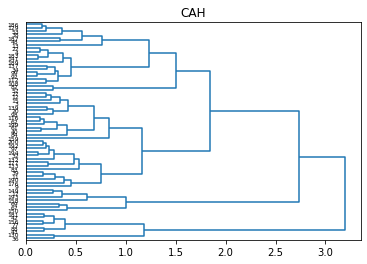

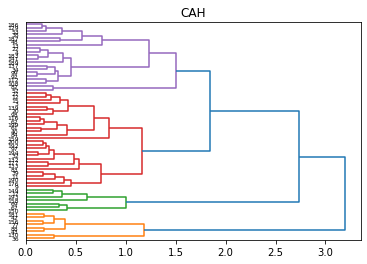

In [178]:
Z = linkage(df_median_scaled,method='ward',metric='euclidean')
threshold = 1.6
plt.title("CAH")
dendrogram(Z,labels=df_median.index,orientation='right',color_threshold=0)
plt.show()
plt.title('CAH')
dendrogram(Z,labels=df_median.index,orientation='right',color_threshold=threshold)
plt.savefig('cah.svg')

In [179]:
import numpy as np
import pandas
groupes_cah = fcluster(Z,t=threshold,criterion='distance')
print(groupes_cah)

[3 4 3 3 3 4 3 2 3 4 3 3 4 1 4 3 3 1 1 4 4 4 3 3 2 2 1 4 3 3 1 4 3 3 4 4 4
 3 4 1 3 3 4 3 4 2 2 1 2 3 3 3 1 4 4 4 4 3 3 2 3 3 3]


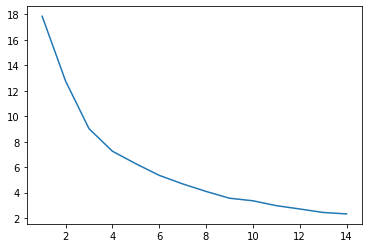

In [175]:
# inertia curve to determine optimal number of clusters with elbow method
inertias=[]
for k in range(1,15):
    kmeans = KMeans(n_clusters=k).fit(df_median_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,15),inertias)

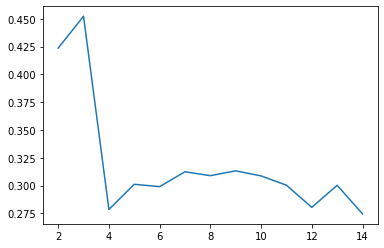

In [176]:
# silhouette curve to determine optimal number of cluster for highest silhouette score
from sklearn.metrics import silhouette_score
silhouettes=[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(df_median_scaled)
    silhouettes.append(silhouette_score(df_median_scaled,kmeans.labels_))
plt.plot(range(2,15),silhouettes)

Text(0, 0.5, 'PCA2')

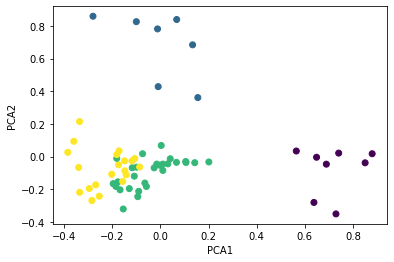

In [180]:
# visualizing group with pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_median_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1], c=groupes_cah)#['r' if p==1 else 'b' for p in groupes_cah ])
plt.xlabel('PCA1')
plt.ylabel('PCA2')

In [182]:
idg = np.argsort(groupes_cah)
df1 = pandas.DataFrame(df_median.index[idg],groupes_cah[idg])
df2 = pd.DataFrame.from_dict(airlines_decoder, orient='index')

In [183]:
classif = pd.merge(df1, df2, how = 'left', left_on = 'airline_cat', right_index = True)

In [184]:
df_median['group'] = groupes_cah
df_median_scaled['group'] = groupes_cah
feature_diff = df_median_scaled.groupby('group').median().std()

In [190]:
feature_diff.sort_values(ascending=False)

std_altitude_cruise           0.371408
avg_vertrate_speed_cruise     0.366949
std_speed_cruise              0.252353
std_vertrate_speed_descent    0.142802
std_vertrate_speed_cruise     0.100036
avg_vertrate_speed_descent    0.096499
duration_climb                0.079634
mean_altitude_cruise          0.057510
avg_vertrate_speed_climb      0.046505
duration_descent              0.044876
std_speed_climb               0.042216
avg_speed_descent             0.035170
std_vertrate_speed_climb      0.033962
avg_speed_climb               0.028586
avg_speed_cruise              0.017911
std_speed_descent             0.013237
dtype: float64

In [187]:
idx = feature_diff.sort_values(ascending=False).index

In [189]:
idx

Index(['std_altitude_cruise', 'avg_vertrate_speed_cruise', 'std_speed_cruise',
       'std_vertrate_speed_descent', 'std_vertrate_speed_cruise',
       'avg_vertrate_speed_descent', 'duration_climb', 'mean_altitude_cruise',
       'avg_vertrate_speed_climb', 'duration_descent', 'std_speed_climb',
       'avg_speed_descent', 'std_vertrate_speed_climb', 'avg_speed_climb',
       'avg_speed_cruise', 'std_speed_descent'],
      dtype='object')

In [193]:
columns_sorted = np.array(idx)

In [194]:
# sort the result by the importance of features
importance_column = df_median.groupby('group').median().loc[:,columns_sorted]
with open('classification_stats_importance.csv', 'w') as f:
    f.write(importance_column.to_csv())

,std_altitude_cruise,avg_vertrate_speed_cruise,std_speed_cruise,std_vertrate_speed_descent,std_vertrate_speed_cruise,avg_vertrate_speed_descent,duration_climb,mean_altitude_cruise,avg_vertrate_speed_climb,duration_descent,std_speed_climb,avg_speed_descent,std_vertrate_speed_climb,avg_speed_climb,avg_speed_cruise,std_speed_descent
group,,,,,,,,,,,,,,,,
1,168.912173,-0.000037,5.839012,3.706753,0.226017,-6.873351,1220.0,11034.156365,8.421344,1655.0,41.916626,162.664291,4.034074,197.021390,233.734178,53.337206
2,5.097527,0.048801,5.183573,2.278364,0.188580,-5.206875,1000.0,9784.556250,8.636699,1739.5,39.485181,151.148334,4.067120,182.961260,236.825596,51.956242
3,6.688130,0.000000,3.102418,3.934636,0.249860,-7.112391,1064.5,11270.021152,9.696522,1550.0,45.258765,161.511544,4.299688,189.572335,224.726929,52.912215
4,4.332675,0.000000,1.960683,3.494997,0.175654,-6.447822,1245.0,10970.900776,8.585675,1575.0,42.113074,152.238226,3.850046,193.481036,232.107106,50.902117


In [195]:
pandas.set_option('display.max_rows', 63)
with open('classification.csv','w') as f:
    f.write(classif.to_csv())

,airline_cat,0
1,88,Frontier Airlines
1,77,Delta Air Lines
1,130,Pakistan International Airlines
1,181,United Airlines
1,43,American Airlines
1,42,Allegiant Air
1,36,Airblue
1,156,Spirit Airlines
2,69,China Southern Airlines
2,67,China Eastern Airlines
